
# Модели временных рядов с марковскими переключениями

Алексей Артемов

## $\log_e e$. Что такое модель (временного ряда) с переключением?

Обозначим $s_t$ ненаблюдаемую переменную состояния, принимающую значения 0 или 1. Простейшая модель переключения для переменной $z_t$ состоит из двух спецификаций типа AR:

$$
z_t = 
\begin{cases}
\alpha_0 + \beta z_{t - 1} + \varepsilon_t, & s_t = 0, \\
\alpha_0 + \alpha_1 + \beta z_{t - 1} + \varepsilon_t, & s_t = 1.
\end{cases}
$$

где $|\beta| < 1$ и $\varepsilon_t ~ \text{i.i.d.}$ с нулевым средним и дисперсией $\sigma_{\varepsilon}^2$.

In [32]:
%pylab inline
import numpy as np
eps = np.random.normal(size=100)
alpha_0 = 0.
alpha_1 = 1.
beta = .05
s = np.random.binomial(n=1, p=0.8, size=100)
z1 = alpha_0 + beta * eps
z2 = alpha_0 + alpha_1 + beta * eps

Populating the interactive namespace from numpy and matplotlib


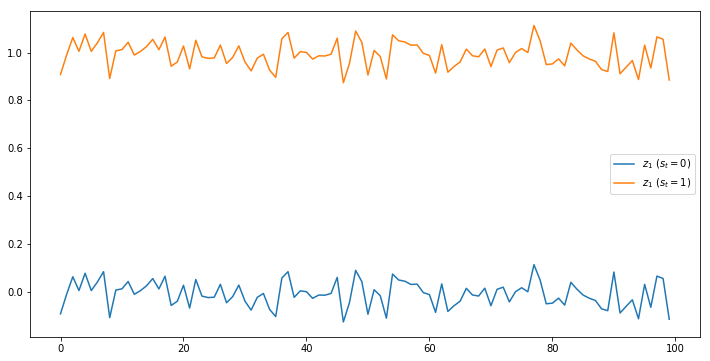

In [33]:
f, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
axs.plot(z1, label='$z_1$ ($s_t = 0$)')
axs.plot(z2, label='$z_1$ ($s_t = 1$)')
axs.legend()

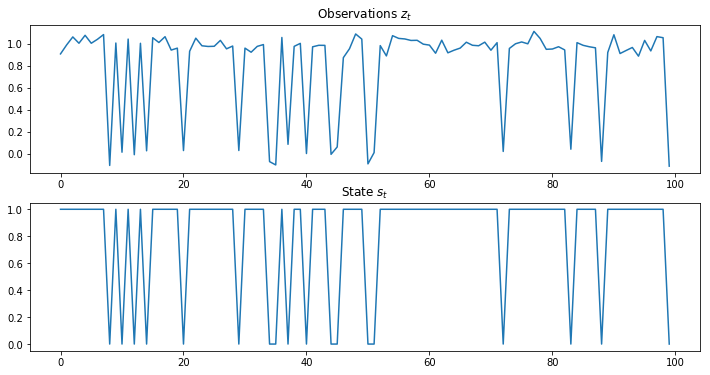

In [36]:
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
z = []
for t, s_t in enumerate(s):
    if s_t == 0:
        z.append(z1[t])
    else:
        z.append(z2[t])
axs[0].plot(z)
axs[0].set_title('Observations $z_t$')
axs[1].plot(s)
axs[1].set_title('State $s_t$')

Это стационарный AR(1) процесс со средним $\frac {\alpha_0} {1 - \beta}$ при $s_t = 0$ и переключающийся на другой стационарный AR(1) процесс со средним $\frac {\alpha_0 + \alpha_1} {1 - \beta}$, когда $s_t$ переключается с 0 на 1.

 * если $\alpha_1 \neq 0$: два динамических паттерна в зависимости от значения переменной состояния $s_t$;
 * в этом случае $z_t$ управляется двумя распределениями с разным средним;
 * переменная $s_t$ отвечает за переключение между этими распределениями (режимами).

* Только что показанный пример: $s_t \sim \text{Bern}(p), p = 0.8$.

* В этой модели $s_t$ не зависит от предыдущих и будущих реализаций, поэтому $z_t$ может сильно "прыгать" (часто переключаться между разными состояниями).

## $-\text{cos} (\pi) / \text{sin} (\pi / 6 )$. Что такое модель с марковским переключением?

Пусть, как раньше,
$$
z_t = 
\begin{cases}
\alpha_0 + \beta z_{t - 1} + \varepsilon_t, & s_t = 0, \\
\alpha_0 + \alpha_1 + \beta z_{t - 1} + \varepsilon_t, & s_t = 1.
\end{cases}
$$

Обозначим $s_t$ ненаблюдаемую переменную состояния, принимающую значения 0 или 1 согласно марковской цепи первого порядка:

$$
\mathrm{P} = 
\begin{pmatrix}
    \mathbb{P}(s_t = 0 \mid  s_{t-1} = 0) & \mathbb{P}(s_t = 1 \mid  s_{t-1} = 0) \\
    \mathbb{P}(s_t = 0 \mid  s_{t-1} = 1) & \mathbb{P}(s_t = 1 \mid  s_{t-1} = 1) \\
\end{pmatrix}
 = 
\begin{pmatrix}
    p_{00} & p_{01} \\
    p_{10} & p_{11}
\end{pmatrix},
$$
где за $p_{ij}, i, j \in \{0, 1\}$ обозначена вероятность перехода в состояние $s_t = j$ из состояния $s_{i-1} = i$. 

 * Матрица перехода управляет случайным поведением переменной состояния и зависит только от двух параметров ($p_{00}$ и $p_{11}$).
 * Модель такого типа называют моделью с марковскими переключениями.
 * Свойства $z_t$ определяются характеристиками распределения как $\varepsilon_t$, так и переменной состояния $s_t$.
 * В частности, марковская переменная состояния приводит к случайным и частым сменам режима, а вероятности перехода определяют персистентность каждого из режимов.

Важный факт: распределение наблюдений обусловлено ненаблюдаемой переменной состояния:
$$
\text{Law}(z_t) = \text{Law}(z_t | s_t)
$$

Например:
 * $\text{Law}(z_t | s_t = 0) = \mathcal{N}(\frac {\alpha_0} {1 - \beta}, \sigma_{\varepsilon}^2)$
 * $\text{Law}(z_t | s_t = 1) = \mathcal{N}(\frac {\alpha_0 + \alpha_1} {1 - \beta}, \sigma_{\varepsilon}^2)$

## $\sqrt{9}$. Как сгенерировать траекторию модели с марковскими переключениями?

Populating the interactive namespace from numpy and matplotlib


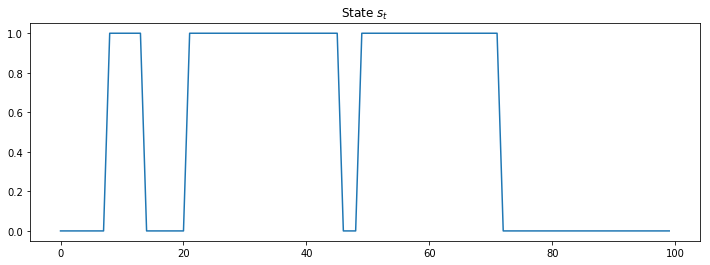

In [45]:
%pylab inline
import numpy as np

# 1. Генерирование марковской цепи с 2 скрытыми состояниями
P = np.array([
    [0.95, 0.05],
    [0.05, 0.95],
])
s = [0]
for t in xrange(99):
    distribution = P[s[-1]]
    s.append(np.random.choice([0, 1], p=distribution))

f, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
axs.plot(s)
axs.set_title('State $s_t$')

In [48]:
# 2. Генерирование наблюдений из распределений, обусловленных ненаблюдаемым состоянием
eps = np.random.normal(size=100)
alpha_0 = 0.
alpha_1 = 1.
beta = .05
z1 = alpha_0 + beta * eps
z2 = alpha_0 + alpha_1 + beta * eps
z = []
for t, s_t in enumerate(s):
    if s_t == 0:
        z.append(z1[t])
    else:
        z.append(z2[t])

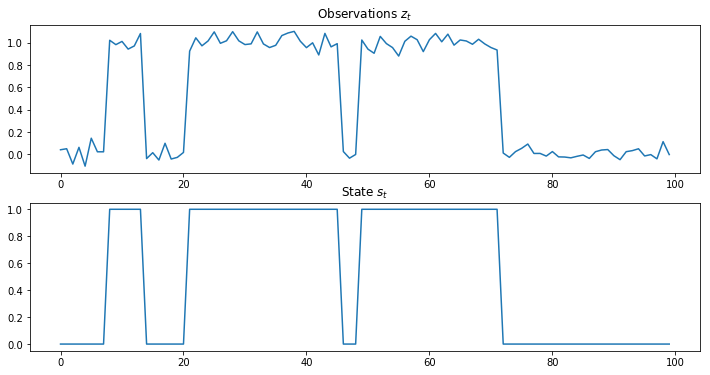

In [49]:
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
axs[0].plot(z)
axs[0].set_title('Observations $z_t$')
axs[1].plot(s)
axs[1].set_title('State $s_t$')

## $00000100$. Что такое скрытые марковские модели?

**Определение**.
Скрытая марковская модель (первого порядка)~--- это вероятностная модель 
последовательности, которая cостоит из набора _наблюдаемых_ переменных 
$\mathbf{X} = \{\mathbf{x}_{1}, \ldots, \mathbf{x}_{n}\}$, где 
$\mathbf{x}_{k} \in \mathbb{R}^{d}$, и набора _латентных_ (или 
_скрытых_) переменных 

$$
    \mathbf{T} = \{\mathbf{t}_{1}, \ldots, \mathbf{t}_{n}\}, \quad 
    \mathbf{t}_{k} \in \{0, 1\}^{K}, \quad \sum_{i = 1}^{K} t_{ki} = 1.
$$ 

 * латентные переменные являются _бинарными_ и кодируют $K$ состояний: переменные состояния;
 * значения наблюдаемого вектора $\mathbf{x}_{k}$ в момент времени $k$ зависят только от скрытого состояния $\mathbf{t}_{k}$;
 * $\mathbf{t}_{k}$, в свою очередь, зависит только от $\mathbf{t}_{k - 1}$.

Пусть в скрытой марковской модели 
$K$ состояний. Закодируем их состояния в момент времени $n$ бинарным 
вектором $\mathbf{t}_{n} = (t_{n1}, \ldots, t_{nK})$ по правилу:

$$
	t_{ij} = 
	\begin{cases}
	1, & \text{система находится в состоянии } j \text{ в момент времени } i, \\
	0, & \text{иначе}.
	\end{cases}
$$

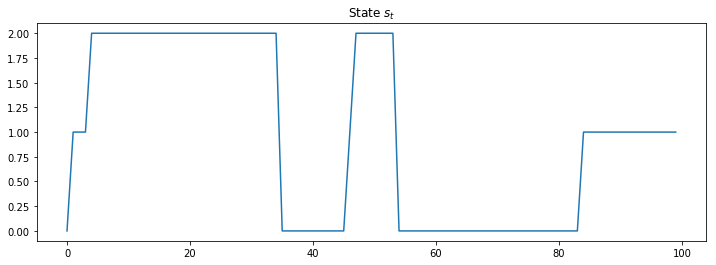

In [73]:
P = np.array([
    [0.95, 0.025, 0.025],
    [0.025, 0.95, 0.025],
    [0.025, 0.025, 0.95],
])
s = [0]
for t in xrange(99):
    distribution = P[s[-1]]
    s.append(np.random.choice([0, 1, 2], p=distribution))
f, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
_ = axs.plot(s)
_ = axs.set_title('State $s_t$')

In [75]:
np.array(s)

array([0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

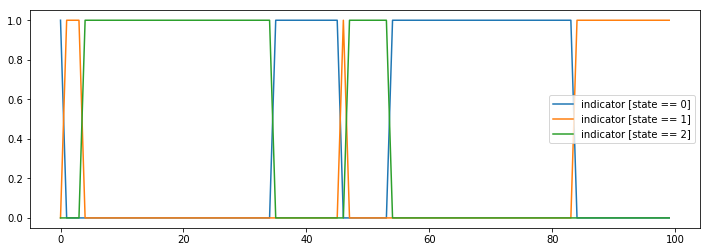

In [76]:
t = np.zeros((3, 100))
for i in xrange(3):
    t[i, :] = (np.array(s) == i).astype(int)
    
f, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
for i in xrange(3):
    _ = axs.plot(t[i, :], label='indicator [state == {}]'.format(i))
_ = axs.legend()

In [94]:
a, b = np.where(t)
assert np.all(np.array(a[np.argsort(b)]) == np.array(s))

Свойства такого формализма:
 * в векторе $\mathbf{t}_{n}$ может быть только один ненулевой элемент;
 * предполагается, что система не может находиться в двух разных состояниях одновременно;
 * распределение $\mathbf{t}_{n}$ относительно $\mathbf{t}_{n - 1}$ -- $p(\mathbf{t}_{n} \mid \mathbf{t}_{n - 1})$: матрица $\mathbf{A}$, где $\mathbf{A}_{ij} = p(t_{nj} = 1 \mid t_{n - 1,i} = 1)$. 

Стоит заметить, что $\sum_{j = 1}^{K} \mathbf{A}_{ij} = 1$. Следовательно, 
распределение можно записать следующим образом:
$$
	p(\mathbf{t}_{n} \mid \mathbf{t}_{n - 1}) = \prod_{i = 1}^{K}\prod_{j = 
	1}^{K} \mathbf{A}_{ij}^{t_{n - 1, i}t_{nj}}.
$$

 * Начальное распределение $p(\mathbf{t}_{1})$. Пусть $\pi_{i} = p(t_{1i} = 1)$. Тогда
$$
	p(\mathbf{t}_{1}) = \prod_{i = 1}^{K} \pi_{i}^{t_{1i}}.
$$

 * Обычно используются матрицы $\mathbf{A}$ с преобладающими элементами на диагонали (более вероятно, что 
система не изменит своего состояния).

 * Переменная $\mathbf{x}_{n}$ зависит только 
от переменной состояния $\mathbf{t}_{n}$: разумно 
рассматривать условное распределение $p(\mathbf{x}_{n} \mid \mathbf{t}_{n})$. 
Обычно предполагается, что оно известно с точностью до параметров $\varphi_{k}, k 
\in \{1, \ldots, K\}$: то есть, если $t_{ni} = 1$, то $p(\mathbf{x}_{n} 
\mid \mathbf{t}_{n}) = p(\mathbf{x}_{n} \mid \varphi_{i})$.
$$
	p(\mathbf{x}_{n} \mid \mathbf{t}_{n}) = \prod_{k = 1}^{K} p(\mathbf{x}_{n} 
	\mid \varphi_{k})^{t_{nk}}.
$$


Введённых параметров достаточно для полного описания скрытой марковской 
модели. Их собирают в _набор параметров_
$$
	\Theta = (\mathbf{\pi}, \mathbf{A}, \mathbf{\varphi}), \quad \text{ где } \quad \mathbf{\pi} = 
	(\pi_{1}, \ldots, \pi_{K}), \quad \mathbf{\varphi} = (\varphi_{1}, \ldots, \varphi_{K}).
$$



Основные задачи теории скрытых марковских процессов:

 * __Обучение с учителем__. Пусть есть некоторая последовательность $\mathbf{X}$, для которой известны латентные переменные $\mathbf{T}$. 
	По обучающей выборке нужно оценить набор параметров $\Theta$.

 * __Сегментация__. Пусть известна последовательность наблюдаемых 
 переменных $\mathbf{X}$ и набор параметров $\Theta$. По ним нужно 
построить максимально правдоподобный набор латентных переменных 
$\mathbf{T}$, то есть найти $\arg\max_{\mathbf{T}} p(\mathbf{T} \mid 
\mathbf{X}, \Theta)$.

 * __Обучение без учителя__. Пусть известна последовательность 
наблюдаемых переменных $\mathbf{X}$ и число состояний $K$. Нужно 
оценить набор параметров $\Theta$. Подзадача - __нахождение 
маргинального распределения__: найти $p(t_{n} \mid \mathbf{X}, \Theta)$.

 * __Прогнозирование__. Пусть известна некоторая последовательность 
$\mathbf{X}$ длины $N$. Нужно оценить наблюдаемый вектор в момент 
времени $N + 1$, то есть найти $p(\mathbf{x}_{N + 1} \mid \mathbf{X})$.


## $125:25$. Как сгенерировать траекторию скрытой марковской модели?

In [115]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from hmmlearn import hmm
np.random.seed(42)

model = hmm.GaussianHMM(n_components=3, covariance_type="full")
model.startprob_ = np.array([0.6, 0.3, 0.1])
model.transmat_ = np.array([[0.7, 0.2, 0.1],
                            [0.3, 0.5, 0.2],
                            [0.3, 0.3, 0.4]])
model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X, Z = model.sample(100)

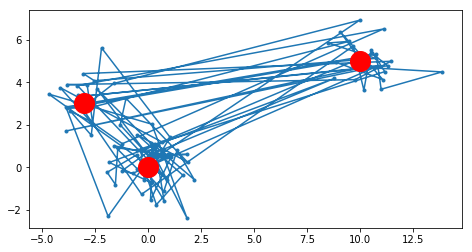

In [114]:
f, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
_ = axs.plot(X[:, 1], X[:, 0], '.-')
_ = axs.plot(model.means_[:, 1], model.means_[:, 0], 'ro', ms=20)
_ = axs.legend()
axs.set_aspect('equal')

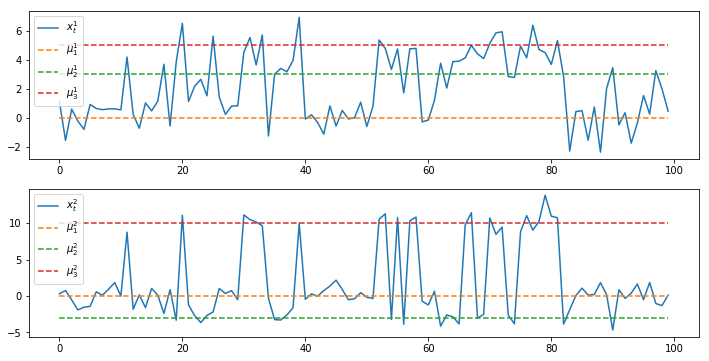

In [134]:
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
_ = axs[0].plot(X[:, 0], label='$x^1_t$')
for i in xrange(3):
    _ = axs[0].plot(range(len(X)), model.means_[i, 0] * np.ones(len(X)), '--', label='$\mu^1_{}$'.format(i+1))
_ = axs[0].legend()

_ = axs[1].plot(X[:, 1], label='$x^2_t$')
for i in xrange(3):
    _ = axs[1].plot(range(len(X)), model.means_[i, 1] * np.ones(len(X)), '--', label='$\mu^2_{}$'.format(i+1))
_ = axs[1].legend()

## $34 \% 7$. Как оценить параметры HMM, если известны скрытые состояния?

## $7$. Как оценить скрытые состояния HMM, если известны параметры и траектория